<h1> Investment Analysis Assignment </h1>

### Assignment Brief:

You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

### Business and Data Understanding

Spark Funds has two minor constraints for investments:

1. It wants to invest between 5 to 15 million USD per round of investment

2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

For our analysis we consider a country to be English speaking only if English is one of the official languages in that country

We use this list: Click <a href="https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language"> here</a> for a list of countries where English is an official language.

### 1. What is the strategy?

Spark Funds wants to invest where most other investors are investing. This pattern is often observed among early stage startup investors.

 

### 2. Where did we get the data from? 

We have taken real investment data from crunchbase.com, so the insights you get may be incredibly useful. For this assignment, we have divided the data into the following files:
1. Company basic data (company.txt)
2. Funding round details (rounds2.csv)
3. Sector Classification info (mapping.csv)

You have to usethree main data tables for the entire analysis.

 

### 3. What is Spark Funds’ business objective?


<b>Business objective:</b> The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

<b>Goals of data analysis:</b> Your goals are divided into three sub-goals:

<b>Investment type analysis:</b> Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.

<b>Country analysis:</b> Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.

<b>Sector analysis</b>: Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector.)

#### Importing Python libraries:

In [126]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import re

#### Reading input from given files

In [2]:
companies_df=pd.read_csv("companies.txt",sep="\t", encoding ="ISO-8859-1")
rounds2_df=pd.read_csv("rounds2.csv",encoding = "ISO-8859-1")
mapping_df=pd.read_csv("mapping.csv",encoding="ISO-8859-1")

#### Let us look at the different dataframes and observe the datatypes, shape and structure of them

In [3]:
companies_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
companies_df.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Twidox,Blink,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [6]:
rounds2_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [7]:
rounds2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [8]:
rounds2_df.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


Let us change the formatting of numbers so that we can display large numbers with commas

In [9]:
pd.options.display.float_format = '{:,.2f}'.format

In [10]:
len(companies_df["name"].unique())

66103

In [11]:
rounds2_df.describe()

,raised_amount_usd
count,"94,959.00"
mean,"10,426,869.33"
std,"114,821,247.98"
min,0.00
25%,"322,500.00"
50%,"1,680,511.00"
75%,"7,000,000.00"
max,"21,271,935,000.00"


This looks great!

Lets determine the unique comany name by looking at the values for name and permalink

In [12]:
len(companies_df["name"].unique())

66103

In [13]:
len(companies_df["name"].str.lower().unique())

66038

In [14]:
len(companies_df["permalink"].unique())

66368

In [15]:
len(companies_df["permalink"].str.lower().unique())

66368

In [16]:
len(rounds2_df["company_permalink"].unique())

90247

In [17]:
len(rounds2_df["company_permalink"].str.lower().unique())

66370

This means that there are companies with same name and different permalinks

In [18]:
rounds2_df["company_permalink"] = rounds2_df["company_permalink"].str.lower()
companies_df["permalink"] = companies_df["permalink"].str.lower()

Remove columns trivial to our analysis

In [19]:
companies_df.drop(['homepage_url','founded_at'],axis=1,inplace=True)

In [20]:
rounds2_df.drop('funded_at',axis=1,inplace=True)

## Check duplicate values

In [21]:
companies_df.loc[companies_df.duplicated()]

,permalink,name,category_list,status,country_code,state_code,region,city


In [22]:
rounds2_df.loc[rounds2_df.duplicated()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,raised_amount_usd


#### Both dataframes don't have any duplicate values

## Missing Value Analysis
Let us look at the companies_df and rounds2_df for null values

In [23]:
companies_df.isnull().any()

permalink        False
name              True
category_list     True
status           False
country_code      True
state_code        True
region            True
city              True
dtype: bool

In [24]:
companies_df.isnull().sum()

permalink           0
name                1
category_list    3148
status              0
country_code     6958
state_code       8547
region           8030
city             8028
dtype: int64

In [25]:
companies_df.loc[companies_df['name'].isnull()]

,permalink,name,category_list,status,country_code,state_code,region,city
56916,/organization/tell-it-in,NaN,Startups,closed,USA,OR,"Portland, Oregon",Portland


The columns with null values are categorical and the name column has only one null value, which we leave as only name is missing and the row is still providing valuable information and name could also be derived from the permalink

Columns with null values

In [26]:
rounds2_df.isnull().any()

company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
raised_amount_usd           True
dtype: bool

Number of null values columnwise

In [27]:
rounds2_df.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
raised_amount_usd          19990
dtype: int64

Null value percentage columnwise

In [28]:
rounds2_df.isnull().sum()/len(rounds2_df)*100

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
raised_amount_usd         17.39
dtype: float64

In [29]:
rounds2_df.drop('funding_round_code',axis=1,inplace=True)

In [30]:
rounds2_df.describe()

,raised_amount_usd
count,"94,959.00"
mean,"10,426,869.33"
std,"114,821,247.98"
min,0.00
25%,"322,500.00"
50%,"1,680,511.00"
75%,"7,000,000.00"
max,"21,271,935,000.00"


In [31]:
"{:,}".format(round(rounds2_df['raised_amount_usd'].mean(),2))

'10,426,869.33'

This Data clearly has outliers and imputing with mean would be a wrong choice here, atleast before outlier analysis. So lets impute the values with median.

In [32]:
rounds2_df['raised_amount_usd'].fillna(rounds2_df['raised_amount_usd'].median(),inplace=True)

In [33]:
rounds2_df.isnull().any()

company_permalink          False
funding_round_permalink    False
funding_round_type         False
raised_amount_usd          False
dtype: bool

Now we have no null values in rounds2_df

In [34]:
pd.set_option('display.max_rows', 500)

## Outlier Analysis

In [35]:
rounds2_df['raised_amount_usd'].median()

1680511.0

In [36]:
rounds2_df['raised_amount_usd'].mean()

8905849.550887786

#### Clearly data set has a lot of outliers

#### Lets create a copy of the dataframe and remove the outliers in the copy. This is important as many times we might need outliers based on our data

In [37]:
df2=rounds2_df.copy()

In [38]:
rounds2_df['raised_amount_usd'].sort_values(ascending=False)

106562   21,271,935,000.00
37569    17,600,000,000.00
16470    10,664,943,639.00
86136     5,800,000,000.00
16474     5,000,000,000.00
                ...       
42703                 0.00
50690                 0.00
50632                 0.00
45038                 0.00
58785                 0.00
Name: raised_amount_usd, Length: 114949, dtype: float64

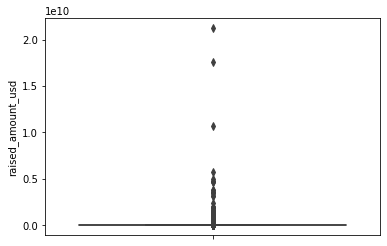

In [39]:
sns.boxplot(y=rounds2_df['raised_amount_usd'])

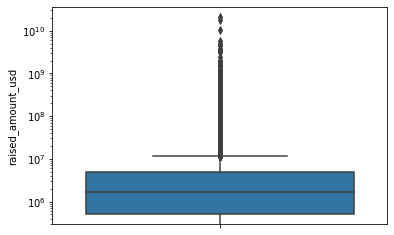

In [40]:
sns.boxplot(y=rounds2_df['raised_amount_usd'])
plt.yscale('log')

In [41]:
Q1 = rounds2_df['raised_amount_usd'].quantile(0.25)
Q3 = rounds2_df['raised_amount_usd'].quantile(0.75)
IQR = Q3 - Q1

df2 = rounds2_df[~((rounds2_df['raised_amount_usd'] < (Q1 - 1.5 * IQR)) |(rounds2_df['raised_amount_usd'] > (Q3 + 1.5 * IQR)))]

In [42]:
df2.describe()

,raised_amount_usd
count,"99,278.00"
mean,"2,213,603.45"
std,"2,589,034.41"
min,0.00
25%,"367,299.25"
50%,"1,680,511.00"
75%,"2,500,000.00"
max,"11,750,000.00"


In [43]:
df2['raised_amount_usd'].mean()

2213603.447521102

In [44]:
rounds2_df['raised_amount_usd'].mean()

8905849.550887786

In [45]:
df2['raised_amount_usd'].sort_values(ascending=True).head(500)

110202     0.00
41767      0.00
42506      0.00
97965      0.00
42703      0.00
43119      0.00
43630      0.00
97786      0.00
41549      0.00
81020      0.00
44601      0.00
44798      0.00
44810      0.00
45038      0.00
45246      0.00
89168      0.00
45571      0.00
97700      0.00
98218      0.00
2893       0.00
41183      0.00
38227      0.00
7893       0.00
38726      0.00
38789      0.00
111196     0.00
98988      0.00
88958      0.00
40116      0.00
40275      0.00
40290      0.00
40322      0.00
40556      0.00
40583      0.00
40707      0.00
40840      0.00
7591       0.00
81683      0.00
45578      0.00
80898      0.00
89216      0.00
46291      0.00
1060       0.00
49945      0.00
89330      0.00
50086      0.00
50087      0.00
50323      0.00
50382      0.00
96589      0.00
50430      0.00
50632      0.00
50690      0.00
110099     0.00
51266      0.00
6475       0.00
80429      0.00
51330      0.00
110065     0.00
49749      0.00
38020      0.00
49544      0.00
6665    

## Creating the Master frame
Lets merge the df2 and companies_df on our primary key company_permalink (left inner join)

In [46]:
master_frame1=pd.merge(df2,companies_df,how="left",left_on="company_permalink",right_on="permalink")

In [47]:
master_frame1.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,"1,680,511.00",/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,"700,000.00",/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,"3,406,878.00",/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,"2,000,000.00",/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing


In [48]:
master_frame1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99278 entries, 0 to 99277
Data columns (total 12 columns):
company_permalink          99278 non-null object
funding_round_permalink    99278 non-null object
funding_round_type         99278 non-null object
raised_amount_usd          99278 non-null float64
permalink                  99271 non-null object
name                       99270 non-null object
category_list              96082 non-null object
status                     99271 non-null object
country_code               91283 non-null object
state_code                 89246 non-null object
region                     89980 non-null object
city                       89982 non-null object
dtypes: float64(1), object(11)
memory usage: 9.8+ MB


In [49]:
master_frame1.shape

(99278, 12)

In [50]:
master_frame1.isnull().any()

company_permalink          False
funding_round_permalink    False
funding_round_type         False
raised_amount_usd          False
permalink                   True
name                        True
category_list               True
status                      True
country_code                True
state_code                  True
region                      True
city                        True
dtype: bool

In [51]:
master_frame1.loc[master_frame1['permalink'].isnull()]

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city
25300,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,"1,680,511.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27243,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,"1,680,511.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38925,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,"1,680,511.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50393,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,"1,625,585.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87286,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,"1,680,511.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95022,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,"1,680,511.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98347,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,"1,680,511.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
master_frame1.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
raised_amount_usd              0
permalink                      7
name                           8
category_list               3196
status                         7
country_code                7995
state_code                 10032
region                      9298
city                        9296
dtype: int64

In [53]:
master_frame1.isnull().sum()/len(master_frame1)*100

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
raised_amount_usd          0.00
permalink                  0.01
name                       0.01
category_list              3.22
status                     0.01
country_code               8.05
state_code                10.10
region                     9.37
city                       9.36
dtype: float64

In [54]:
master_frame1.groupby('funding_round_type')['raised_amount_usd'].sum().sort_values(ascending=False)

funding_round_type
venture                 152,562,245,913.00
seed                     27,451,803,168.00
debt_financing           11,476,644,789.00
undisclosed               8,263,920,769.00
angel                     5,658,705,518.00
equity_crowdfunding       3,976,472,982.00
private_equity            3,898,661,682.00
grant                     2,440,540,161.00
convertible_note          1,738,199,536.00
post_ipo_equity           1,342,115,419.00
product_crowdfunding        327,572,692.00
post_ipo_debt               267,311,723.00
non_equity_assistance       213,318,121.00
secondary_market            144,610,590.00
Name: raised_amount_usd, dtype: float64

In [55]:
master_frame1.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
post_ipo_equity         4,315,483.66
post_ipo_debt           3,931,054.75
venture                 3,582,955.52
private_equity          3,484,058.70
secondary_market        1,902,770.92
debt_financing          1,866,424.59
undisclosed             1,759,778.70
equity_crowdfunding     1,222,401.78
grant                   1,174,465.91
non_equity_assistance   1,122,726.95
convertible_note          968,896.06
angel                     932,241.44
seed                      900,265.74
product_crowdfunding      816,889.51
Name: raised_amount_usd, dtype: float64

In [56]:
master_frame1.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
post_ipo_equity         3,300,000.00
post_ipo_debt           3,140,525.00
venture                 2,383,371.50
undisclosed             1,680,511.00
secondary_market        1,680,511.00
private_equity          1,680,511.00
non_equity_assistance   1,680,511.00
equity_crowdfunding     1,680,511.00
debt_financing          1,000,000.00
angel                     598,325.00
seed                      570,000.00
convertible_note          500,000.00
product_crowdfunding      203,282.00
grant                     197,947.50
Name: raised_amount_usd, dtype: float64

## By removing the outliers none of our investment type's have means or medians close to 5-15 million usd, so for our data set outliers are important and we need to include them

#### Good thing we made a copy of rounds2_df and deleted the outliers only on the copy, so lets use the rounds2_df to form our masterframe again

In [60]:
master_frame2=pd.merge(rounds2_df,companies_df,how="left",left_on="company_permalink",right_on="permalink")

In [61]:
master_frame2.shape

(114949, 12)

In [62]:
master_frame2.isnull().any()

company_permalink          False
funding_round_permalink    False
funding_round_type         False
raised_amount_usd          False
permalink                   True
name                        True
category_list               True
status                      True
country_code                True
state_code                  True
region                      True
city                        True
dtype: bool

In [63]:
master_frame2.loc[master_frame2['permalink'].isnull()]

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,"1,680,511.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,"1,680,511.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,"1,680,511.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,"1,625,585.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,"1,680,511.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,"1,680,511.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,"1,680,511.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
master_frame2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
raised_amount_usd              0
permalink                      7
name                           8
category_list               3414
status                         7
country_code                8678
state_code                 10946
region                     10167
city                       10164
dtype: int64

In [66]:
master_frame2.isnull().sum()/len(master_frame2)*100

company_permalink         0.00
funding_round_permalink   0.00
funding_round_type        0.00
raised_amount_usd         0.00
permalink                 0.01
name                      0.01
category_list             2.97
status                    0.01
country_code              7.55
state_code                9.52
region                    8.84
city                      8.84
dtype: float64

In [67]:
master_frame2.groupby('funding_round_type')['raised_amount_usd'].sum().sort_values(ascending=False)

funding_round_type
venture                 598,975,787,802.00
private_equity          142,511,934,444.00
debt_financing          114,242,789,729.00
post_ipo_equity          51,627,411,261.00
undisclosed              36,012,323,662.00
seed                     28,620,680,812.00
post_ipo_debt            25,643,094,917.00
grant                     9,262,142,981.00
angel                     6,733,005,697.00
equity_crowdfunding       4,070,872,982.00
convertible_note          2,724,914,642.00
secondary_market          2,498,722,118.00
product_crowdfunding        566,500,857.00
non_equity_assistance       228,318,121.00
Name: raised_amount_usd, dtype: float64

In [68]:
master_frame2.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
post_ipo_debt           168,704,571.82
post_ipo_equity          80,920,707.31
private_equity           62,368,461.46
secondary_market         26,302,338.08
debt_financing           16,568,932.52
venture                  10,793,523.40
undisclosed               7,353,956.23
grant                     4,210,064.99
convertible_note          1,499,677.84
product_crowdfunding      1,381,709.41
equity_crowdfunding       1,249,884.24
non_equity_assistance     1,195,382.83
angel                     1,104,858.17
seed                        937,645.16
Name: raised_amount_usd, dtype: float64

In [69]:
master_frame2.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
post_ipo_debt           19,950,000.00
private_equity          12,122,011.00
post_ipo_equity         12,000,000.00
venture                  4,000,000.00
undisclosed              1,680,511.00
secondary_market         1,680,511.00
non_equity_assistance    1,680,511.00
equity_crowdfunding      1,680,511.00
debt_financing           1,200,000.00
angel                      600,000.00
seed                       575,000.00
convertible_note           500,000.00
grant                      230,000.00
product_crowdfunding       224,143.00
Name: raised_amount_usd, dtype: float64

In [70]:
master_frame2['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

In [72]:
master_frame2['raised_amount_usd'].loc[master_frame2['funding_round_type']=='venture'].sort_values(ascending=False).describe()

count           55,494.00
mean        10,793,523.40
std         82,205,753.31
min                  0.00
25%          1,680,511.00
50%          4,000,000.00
75%         10,500,000.00
max     17,600,000,000.00
Name: raised_amount_usd, dtype: float64

In [73]:
venture_df=master_frame2.loc[master_frame2['funding_round_type']=='venture']

In [84]:
master_frame = master_frame2[master_frame2['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]

In [87]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,"1,680,511.00",/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,"700,000.00",/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,"3,406,878.00",/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,"2,000,000.00",/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
...,...,...,...,...,...,...,...,...,...,...,...,...
114942,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,"7,000.00",/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split
114943,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,"33,149.00",/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,"32,842.00",/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,"1,680,511.00",/organization/ãeron,ÃERON,NaN,operating,NaN,NaN,NaN,NaN


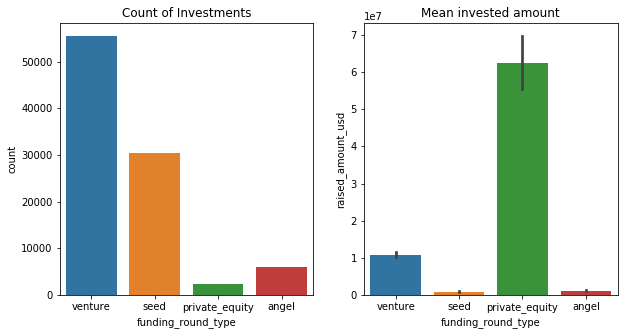

In [85]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.countplot(x="funding_round_type", data=master_frame)
plt.title("Count of Investments")
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=master_frame, estimator=np.mean)
plt.title("Mean invested amount")
plt.show()
##1 unit is 10M usd 

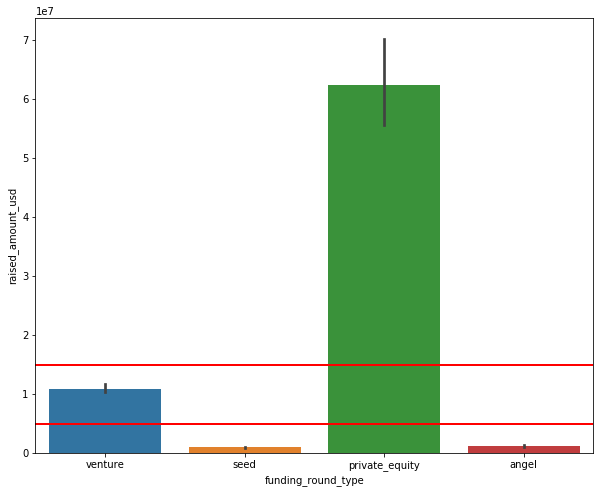

In [194]:
plt.figure(figsize=(10, 8))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.axhline(y=5000000, linewidth=2, color = 'r')
plt.axhline(y=15000000, linewidth=2, color = 'r')
plt.show()
#1 unit is 10M usd 

### Venture clearly the best option for us

In [76]:
top9=venture_df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

In [77]:
top9=top9.to_frame()

In [78]:
top9

,raised_amount_usd
country_code,
USA,"426,263,423,859.00"
CHN,"40,714,326,026.00"
GBR,"20,662,394,144.00"
IND,"14,674,184,566.00"
CAN,"9,734,578,307.00"
FRA,"7,373,811,480.00"
ISR,"7,099,092,833.00"
DEU,"6,730,116,330.00"
JPN,"3,437,619,095.00"


## Since China isn't an English speaking Country we chose USA, GBR and IND i.e. United States,United Kingdom and India

In [86]:
mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [120]:
mapping_df = pd.melt(mapping_df,id_vars=["category_list"])
mapping_df = mapping_df[mapping_df.value != 0]
mapping_df.head(10)


,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
57,Bicycles,Automotive & Sports,1
69,Boating Industry,Automotive & Sports,1
87,CAD,Automotive & Sports,1
93,Cars,Automotive & Sports,1
188,Design,Automotive & Sports,1


### Changing Column names so we can do the merge operation and also maintain consistency

In [122]:
mapping_df = mapping_df.drop('value', axis=1)
mapping_df.rename(columns={'variable':'main_sector','category_list':'primary_sector'}, inplace=True)
mapping_df['primary_sector'] = mapping_df['primary_sector'].str.lower()

#### We need to only consider the first value in category list values that have multiple '|' separated values

In [80]:
master_frame['category_list'].unique()

array(['Media', 'Application Platforms|Real Time|Social Network Media',
       'Apps|Games|Mobile', ...,
       'Analytics|Android|Developer APIs|Education|Gamification|iOS',
       'Advertising|Mobile|Web Development|Wireless',
       'Consumer Electronics|Internet of Things|Telecommunications'],
      dtype=object)

In [81]:
'Application Platforms|Real Time|Social Network Media'.split('|')[0]

'Application Platforms'

In [88]:
master_frame['primary_sector']=master_frame['category_list'].apply(lambda x:str(x).lower().split('|')[0])

C:\Users\dk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
master_frame['primary_sector']

0                         media
1         application platforms
2         application platforms
3                          apps
4                   curated web
                  ...          
114942              advertising
114943              advertising
114945              advertising
114946                      nan
114947     consumer electronics
Name: primary_sector, Length: 94397, dtype: object

In [171]:
top9.index

Index(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN'], dtype='object', name='country_code')

In [196]:
master_frame9=master_frame[master_frame['country_code'].isin(top9.index)]
master_frame9.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,"1,680,511.00",/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,application platforms
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,"700,000.00",/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,application platforms
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,"2,000,000.00",/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,curated web
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,"1,680,511.00",/organization/004-technologies,004 Technologies,Software,operating,USA,IL,"Springfield, Illinois",Champaign,software


In [123]:
master_frame3 = master_frame[master_frame['country_code'].isin(['USA', 'GBR', 'IND'])]

In [124]:
master_frame3 = pd.merge(master_frame3, mapping_df, how='left', on='primary_sector', indicator=True)
master_frame3.head()


,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,_merge
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,media,Entertainment,both
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,"1,680,511.00",/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,application platforms,"News, Search and Messaging",both
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,"700,000.00",/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,application platforms,"News, Search and Messaging",both
3,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,"1,680,511.00",/organization/004-technologies,004 Technologies,Software,operating,USA,IL,"Springfield, Illinois",Champaign,software,Others,both
4,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,"3,000,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,NaN,left_only


In [125]:
mapping_df.primary_sector.sort_values(ascending=True)

1847                 0notechnology
1848    0tural language processing
1849              0tural resources
4602                     0vigation
3441                            3d
                   ...            
2748              wine and spirits
2749                      wireless
5502                         women
5503                  young adults
688                            NaN
Name: primary_sector, Length: 688, dtype: object

#### Somehow na is being shown as 0 in the primary sector values, the simplest way to deal with this is to use a regex and replace 0 with na

In [127]:
mapping_df['primary_sector'] = mapping_df.primary_sector.apply(lambda x: re.sub('[0]', 'na', str(x)))

In [130]:
mapping_df.primary_sector.sort_values(ascending=True).head()

3441                  3d
3442         3d printing
3443       3d technology
5508          accounting
2757    active lifestyle
Name: primary_sector, dtype: object

#### Removing all values that do not fall under our 5-15 Mil threshhold

In [131]:
master_frame3 = master_frame3.drop(master_frame3[(master_frame3.raised_amount_usd < 5000000)].index)
master_frame3 = master_frame3.drop(master_frame3[(master_frame3.raised_amount_usd > 15000000)].index)

d1 = master_frame3[master_frame3['country_code'] == 'USA']
d2 = master_frame3[master_frame3['country_code'] == 'GBR']
d3 = master_frame3[master_frame3['country_code'] == 'IND']

In [197]:
master_frame3['raised_amount_usd'].count()

13641

### Let's make a pivot table for all our sectors to observe count,mean, median and sum all in a tabular format

## D1-USA

In [141]:
d1.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count','mean','median'})

,count,mean,median,sum
main_sector,,,,
Automotive & Sports,178,"8,682,707.06","8,050,000.00","1,545,521,856.00"
Cleantech / Semiconductors,2408,"9,224,783.82","9,000,000.00","22,213,279,446.00"
Entertainment,598,"8,593,516.67","8,000,000.00","5,138,922,970.00"
Health,964,"8,982,796.41","8,577,500.00","8,659,415,735.00"
Manufacturing,822,"9,067,874.60","8,788,115.50","7,453,792,922.00"
"News, Search and Messaging",1614,"8,780,433.38","8,000,000.00","14,171,619,470.00"
Others,3014,"8,914,731.73","8,250,000.00","26,869,001,443.00"
"Social, Finance, Analytics, Advertising",1979,"8,682,407.70","8,000,000.00","17,182,484,847.00"


In [136]:
d1['raised_amount_usd'].count()

12635

In [137]:
d1['raised_amount_usd'].sum()

112562637512.0

In [138]:
d1['raised_amount_usd'].median()

8250000.0

In [139]:
d1['raised_amount_usd'].mean()

8908796.004115552

In [140]:
d1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     3014
Cleantech / Semiconductors                 2408
Social, Finance, Analytics, Advertising    1979
News, Search and Messaging                 1614
Health                                      964
Manufacturing                               822
Entertainment                               598
Automotive & Sports                         178
Name: raised_amount_usd, dtype: int64

In [206]:
d1[d1['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

permalink
/organization/virtustream         64,300,000.00
/organization/capella             54,968,051.00
/organization/airtight-networks   54,201,907.00
/organization/decarta             52,100,000.00
/organization/deliveryagent       51,538,337.00
Name: raised_amount_usd, dtype: float64

In [208]:
d1.loc[d1['permalink']=="/organization/virtustream"]

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,_merge
61005,/organization/virtustream,/funding-round/3354ac55dd5369fa5fb282e7946baadf,venture,"9,550,000.00",/organization/virtustream,Virtustream,Enterprise Software,acquired,USA,MD,"Washington, D.C.",Bethesda,enterprise software,Others,both
61006,/organization/virtustream,/funding-round/4cdede382a6f29d05b59d833773910ee,venture,"10,000,000.00",/organization/virtustream,Virtustream,Enterprise Software,acquired,USA,MD,"Washington, D.C.",Bethesda,enterprise software,Others,both
61008,/organization/virtustream,/funding-round/5f44788266cec29ef0ca4a54bf37c805,venture,"9,750,000.00",/organization/virtustream,Virtustream,Enterprise Software,acquired,USA,MD,"Washington, D.C.",Bethesda,enterprise software,Others,both
61010,/organization/virtustream,/funding-round/ad39aaecd63911d035b37907cebfc3fd,venture,"15,000,000.00",/organization/virtustream,Virtustream,Enterprise Software,acquired,USA,MD,"Washington, D.C.",Bethesda,enterprise software,Others,both
61011,/organization/virtustream,/funding-round/aeb17cd77f13485b94d9f37409caddeb,venture,"5,000,000.00",/organization/virtustream,Virtustream,Enterprise Software,acquired,USA,MD,"Washington, D.C.",Bethesda,enterprise software,Others,both
61013,/organization/virtustream,/funding-round/e609500837793f94351a0c77716baa47,venture,"15,000,000.00",/organization/virtustream,Virtustream,Enterprise Software,acquired,USA,MD,"Washington, D.C.",Bethesda,enterprise software,Others,both


## D2

In [142]:
d2.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count','mean','median'})

,count,mean,median,sum
main_sector,,,,
Automotive & Sports,17,"10,183,092.35","10,000,000.00","173,112,570.00"
Cleantech / Semiconductors,130,"8,941,070.46","8,342,136.50","1,162,339,160.00"
Entertainment,55,"8,639,060.38","8,500,000.00","475,148,321.00"
Health,26,"8,905,288.85","7,846,072.50","231,537,510.00"
Manufacturing,45,"8,710,443.82","8,000,000.00","391,969,972.00"
"News, Search and Messaging",82,"8,219,367.89","7,402,626.50","673,988,167.00"
Others,149,"8,714,392.19","8,000,000.00","1,298,444,436.00"
"Social, Finance, Analytics, Advertising",103,"8,435,549.15","8,000,000.00","868,861,562.00"


In [143]:
d2['raised_amount_usd'].count()

664

In [145]:
d2['raised_amount_usd'].sum()

5726936263.0

In [146]:
d2['raised_amount_usd'].median()

8000000.0

In [147]:
d2['raised_amount_usd'].mean()

8624904.01054217

In [148]:
d2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     149
Cleantech / Semiconductors                 130
Social, Finance, Analytics, Advertising    103
News, Search and Messaging                  82
Entertainment                               55
Manufacturing                               45
Health                                      26
Automotive & Sports                         17
Name: raised_amount_usd, dtype: int64

In [209]:
d2[d2['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

permalink
/organization/electric-cloud            37,000,000.00
/organization/sensage                   36,250,000.00
/organization/enigmatic                 32,500,000.00
/organization/silverrail-technologies   29,000,000.00
/organization/opencloud                 27,972,766.00
Name: raised_amount_usd, dtype: float64

In [220]:
d2.loc[d2['permalink']=='/organization/electric-cloud']

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,_merge
17581,/organization/electric-cloud,/funding-round/0471ecf9dc235b2d8900b4acf6fa47b0,venture,"9,000,000.00",/organization/electric-cloud,Electric Cloud,Software,operating,GBR,H9,London,London,software,Others,both
17582,/organization/electric-cloud,/funding-round/18b59aa860d015808d7e0e4a5dfe2e7e,venture,"8,000,000.00",/organization/electric-cloud,Electric Cloud,Software,operating,GBR,H9,London,London,software,Others,both
17583,/organization/electric-cloud,/funding-round/92b7e109112fc2d0bb8e72a07cd64013,venture,"8,000,000.00",/organization/electric-cloud,Electric Cloud,Software,operating,GBR,H9,London,London,software,Others,both
17586,/organization/electric-cloud,/funding-round/cfc71183f508736cbf12dc17d2f2c91f,venture,"12,000,000.00",/organization/electric-cloud,Electric Cloud,Software,operating,GBR,H9,London,London,software,Others,both


## D3

In [149]:
d3.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count','mean','median'})

,count,mean,median,sum
main_sector,,,,
Automotive & Sports,13,"10,530,769.23","11,000,000.00","136,900,000.00"
Cleantech / Semiconductors,21,"8,284,761.90","8,000,000.00","173,980,000.00"
Entertainment,34,"8,642,058.82","8,090,000.00","293,830,000.00"
Health,20,"8,687,000.00","9,000,000.00","173,740,000.00"
Manufacturing,21,"9,566,666.67","10,000,000.00","200,900,000.00"
"News, Search and Messaging",53,"8,298,765.00","8,000,000.00","439,834,545.00"
Others,113,"9,202,739.00","9,000,000.00","1,039,909,507.00"
"Social, Finance, Analytics, Advertising",34,"8,913,044.12","8,450,000.00","303,043,500.00"


In [150]:
d3['raised_amount_usd'].count()

342

In [151]:
d3['raised_amount_usd'].sum()

3065543602.0

In [152]:
d3['raised_amount_usd'].median()

8610000.0

In [153]:
d3['raised_amount_usd'].mean()

8963577.783625731

In [154]:
d3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     113
News, Search and Messaging                  53
Social, Finance, Analytics, Advertising     34
Entertainment                               34
Manufacturing                               21
Cleantech / Semiconductors                  21
Health                                      20
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [210]:
d3[d3['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

permalink
/organization/firstcry-com       39,000,000.00
/organization/myntra             38,000,000.00
/organization/commonfloor        32,900,000.00
/organization/pepperfry-com      28,000,000.00
/organization/itzcash-card-ltd   25,000,000.00
Name: raised_amount_usd, dtype: float64

In [219]:
d3.loc[d3['permalink']=='/organization/firstcry-com']

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,_merge
20312,/organization/firstcry-com,/funding-round/23b1769412d24510dfc7a56ab1f12e4d,venture,"15,000,000.00",/organization/firstcry-com,FirstCry.com,E-Commerce,operating,IND,16,Pune,Pune,e-commerce,Others,both
20313,/organization/firstcry-com,/funding-round/727bda07de7b5eaf31e484cb803b3c38,venture,"10,000,000.00",/organization/firstcry-com,FirstCry.com,E-Commerce,operating,IND,16,Pune,Pune,e-commerce,Others,both
20314,/organization/firstcry-com,/funding-round/c2bd1e484cde75ff8b15f2ca4682e5cb,venture,"14,000,000.00",/organization/firstcry-com,FirstCry.com,E-Commerce,operating,IND,16,Pune,Pune,e-commerce,Others,both


## Plots

### Funding Type

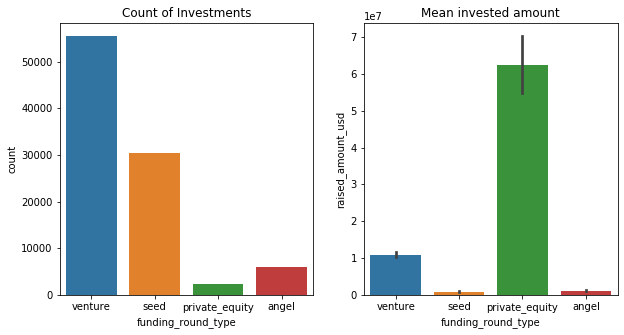

In [155]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.countplot(x="funding_round_type", data=master_frame)
plt.title("Count of Investments")
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=master_frame, estimator=np.mean)
plt.title("Mean invested amount")
plt.show()
##1 unit is 10M usd 

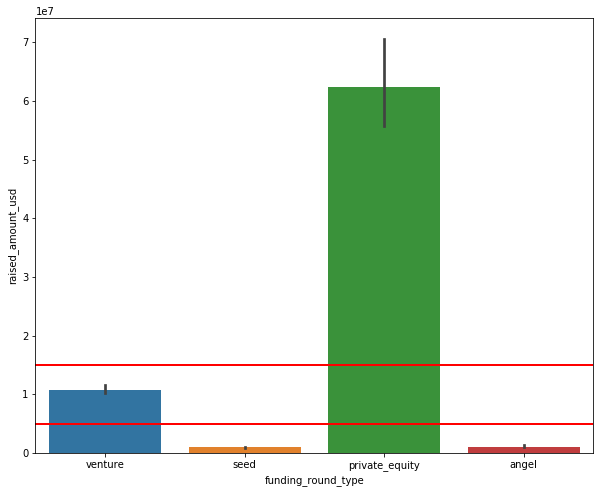

In [165]:
plt.figure(figsize=(10, 8))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.axhline(y=5000000, linewidth=2, color = 'r')
plt.axhline(y=15000000, linewidth=2, color = 'r')
plt.show()
#1 unit is 10M usd 

Clearly the above 2 plots show us that venture is the best investment type for our needs.

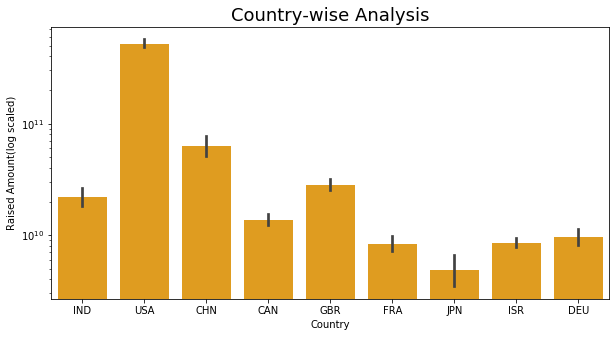

In [211]:
plt.figure(figsize=(10,5))
c=sns.barplot(x='country_code', y='raised_amount_usd', data=master_frame9, estimator=np.sum,color='orange')
c.set_yscale('log')
c.set(xlabel='Country', ylabel='Raised Amount(log scaled)')
c.set_title('Country-wise Analysis',fontsize =18)
plt.show()

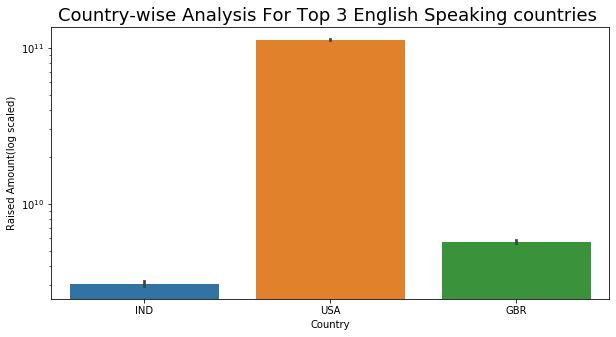

In [182]:
plt.figure(figsize=(10,5))
c=sns.barplot(x='country_code', y='raised_amount_usd', data=master_frame3, estimator=np.sum)
c.set_yscale('log')
c.set(xlabel='Country', ylabel='Raised Amount(log scaled)')
c.set_title('Country-wise Analysis For Top 3 English Speaking countries ',fontsize =18)
plt.show()

### For the Sector analysis in top 3 countries we include only top 3 sectors for the top 3 English Speaking Countries

In [189]:
d11 = d1[d1['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]
d22 = d2[d2['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","Cleantech / Semiconductors"])]
d33 = d3[d3['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","News, Search and Messaging"])]

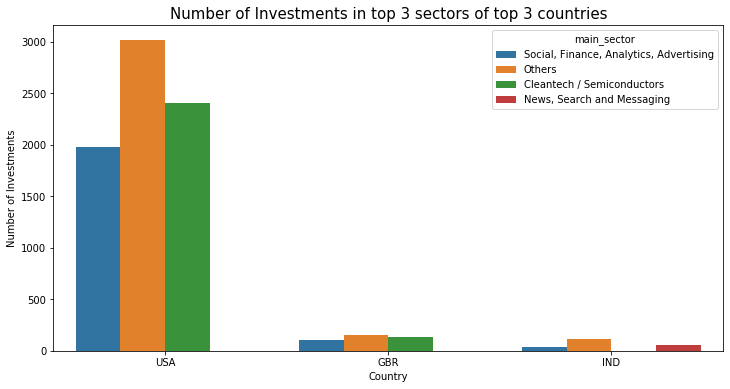

In [218]:
result = pd.concat([d11,d22,d33])
plt.figure(figsize=(12, 6))
p=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=result, estimator=lambda x: len(x))
p.set(xlabel='Country', ylabel='Number of Investments')
p.set_title('Number of Investments in top 3 sectors of top 3 countries',fontsize=15)

plt.show()
#1 unit is 10M usd 